In [0]:
# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

TensorFlow 2.x selected.


In [0]:
# Creating the data set and splitting data into test and train data

num_observations = 10000

x1 = np.random.multivariate_normal([0, 0], [[0.1, 0.2],[0.2, 0.1]], num_observations)
x2 = np.random.multivariate_normal([3, 3], [[0.1, 0.2],[0.2, 0.1]], num_observations)
x3 = np.random.multivariate_normal([3, 0], [[0.1, 0.2],[0.2, 0.1]], num_observations)
x4 = np.random.multivariate_normal([0, 3], [[0.1, 0.2],[0.2, 0.1]], num_observations)

features = np.vstack((x1,x2,x3,x4)).astype(np.float32)
labels = np.hstack((np.full(num_observations,0), np.full(num_observations,1),np.full(2*num_observations,2)))

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state = 42)

Text(0, 0.5, 'x2 - Feature 2')

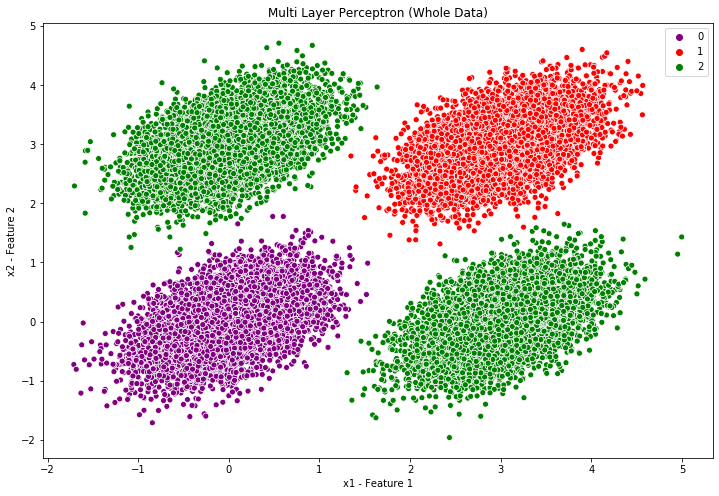

In [0]:
# Visualizing the whole dataset

plt.figure(figsize = (12, 8))
# Creating a scatter plot with the features and labels
sns.scatterplot(x = features[:,0], y = features[:,-1], hue = labels, palette=['purple', 'red', 'green'])
# Setting the labels and title for the plot
plt.title('Multi Layer Perceptron (Whole Data)')
plt.xlabel('x1 - Feature 1')
plt.ylabel('x2 - Feature 2')

In [0]:
def visualise_decision_boundary(X_set, y_set, model):
  ''' Visualising the predicted labels of the test set for every setting
      Arguments : Test features (X_set), Predicted labels(y_set), model trained on each setting
      Returns   : Nothing'''
  
  plt.figure(figsize = (12,8))

  # Creating a grid with pixels of resolution 0.01 using min and max values of two features for getting the extimated range
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  
  # Plotting the desicion boundary by predicting all the pixel values in the grid with the model
  plt.contourf(X1, X2, model.predict_classes(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.25, cmap = ListedColormap(('purple', 'red', 'green')))
  # Setting the limits to x and y axes
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())

  # Creating a scatter plot with the testing features and labels
  sns.scatterplot(x = X_set[:, 0], y = X_set[:, -1], hue = y_set, palette=['purple','red', 'green'])
  
  # Setting the labels and title of the plot
  plt.title('Multi Layer Perceptron (Test set)')
  plt.xlabel('x1 - Feature 1')
  plt.ylabel('x2 - Feature 2')

In [0]:
def build_fc_model(node1, node2, dropout):
  ''' Building a fully connected layer model for each setting
      Arguments : Number of nodes in 1st layer (node1), 2nd layer (node2), dropout on each setting
      Returns   : Developed model '''

  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(node1, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(node2, activation='softmax')
    #tf.keras.layers.Dropout(dropout)

  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

**Setting 1**

In [0]:
# Building model for Setting 1
model1 = build_fc_model(10, 10, 0.1)

# Training
print("Training Results")
model1.fit(X_train, y_train, epochs=5)

# Testing
print("\nTesting Results")
model1.evaluate(X_test,  y_test, verbose=2)

Training Results
Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 3s 99us/sample - loss: 0.7601 - accuracy: 0.7738
Epoch 2/5
26800/26800 [==============================] - 2s 75us/sample - loss: 0.1453 - accuracy: 0.9617
Epoch 3/5
26800/26800 [==============================] - 2s 76us/sample - loss: 0.0773 - accuracy: 0.9807
Epoch 4/5
26800/26800 [==============================] - 2s 78us/sample - loss: 0.0548 - accuracy: 0.9859
Epoch 5/5
26800/26800 [==============================] - 2s 79us/sample - loss: 0.0425 - accuracy: 0.9879

Testing Results
13200/1 - 1s - loss: 0.0325 - accuracy: 0.9980


[0.01031589998440309, 0.9980303]

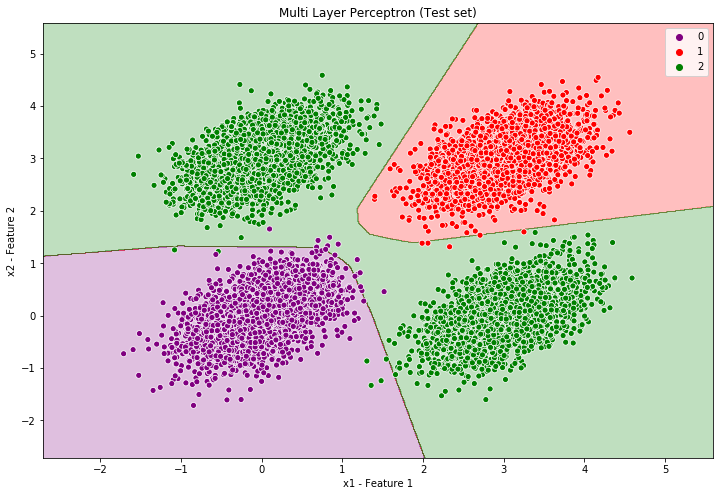

In [0]:
# Visualizing decision boundary for model 1
visualise_decision_boundary(X_test, y_test, model1)

**Evaluation on Setting 1:**                                                        
Nodes in Layer 1 - 10, Layer 2 - 10; Dropout = 0.1                              
Training accuracy = 98.58 ; Testing Acuuracy = 99.80                            

With low dimensions and low dropout, decision boundary is smooth for this model leaving few features out of the respective boundaries.


**Setting 2**

In [0]:
# Building model for Setting 2
model2 = build_fc_model(20, 30, 0.1)

# Training
print("Training Results")
model2.fit(X_train, y_train, epochs=5)

# Testing
print("\nTesting Results")
model2.evaluate(X_test,  y_test, verbose=2)

Training Results
Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 3s 97us/sample - loss: 0.8135 - accuracy: 0.8281
Epoch 2/5
26800/26800 [==============================] - 2s 80us/sample - loss: 0.0732 - accuracy: 0.9869
Epoch 3/5
26800/26800 [==============================] - 2s 79us/sample - loss: 0.0314 - accuracy: 0.9946
Epoch 4/5
26800/26800 [==============================] - 2s 82us/sample - loss: 0.0201 - accuracy: 0.9960
Epoch 5/5
26800/26800 [==============================] - 2s 80us/sample - loss: 0.0147 - accuracy: 0.9967

Testing Results
13200/1 - 1s - loss: 0.0154 - accuracy: 0.9995


[0.004001074773259461, 0.99954545]

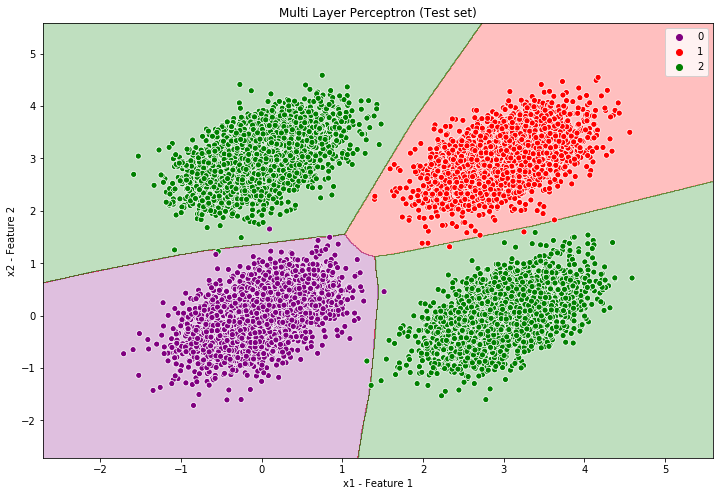

In [0]:
# Visualizing decision boundary for model 2
visualise_decision_boundary(X_test, y_test, model2)

**Evaluation on Setting 2:**                                                        
Nodes in Layer 1 - 20, Layer 2 - 30; Dropout = 0.1                               
Training accuracy = 99.77 ; Testing Acuuracy = 99.90                            

With increased number of dimensions decision boundary is fitting mostly perfect for the test data in this model. Very few features of each class were plotted wrong and the curves doesn't seem to be overfitting.


**Setting3**

In [0]:
# Setting 3
# Building model for Setting 3
model3 = build_fc_model(50, 50, 0.8)

# Training
print("Training Results")
model3.fit(X_train, y_train, epochs=5)

# Testing
print("\nTesting Results")
model3.evaluate(X_test,  y_test, verbose=2)

Training Results
Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 3s 101us/sample - loss: 1.0763 - accuracy: 0.7269
Epoch 2/5
26800/26800 [==============================] - 2s 80us/sample - loss: 0.2804 - accuracy: 0.8975
Epoch 3/5
26800/26800 [==============================] - 2s 81us/sample - loss: 0.2265 - accuracy: 0.9109
Epoch 4/5
26800/26800 [==============================] - 2s 83us/sample - loss: 0.2134 - accuracy: 0.9137
Epoch 5/5
26800/26800 [==============================] - 2s 80us/sample - loss: 0.1961 - accuracy: 0.9199

Testing Results
13200/1 - 1s - loss: 0.0578 - accuracy: 0.9943


[0.03146181139361226, 0.9943182]

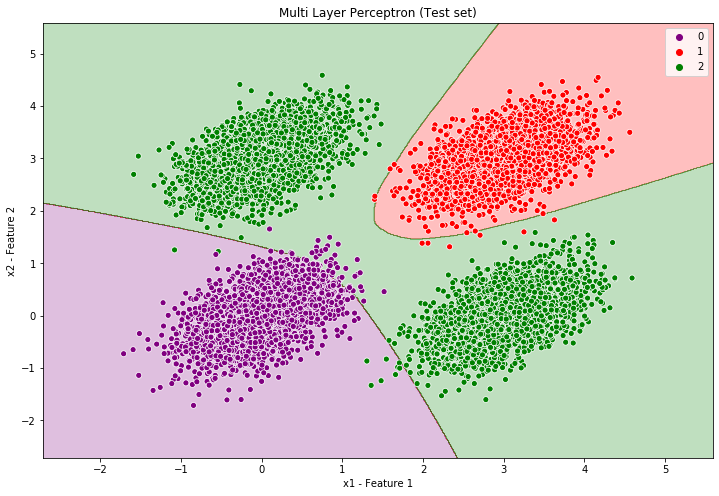

In [0]:
# Visualizing decision boundary for model 3
visualise_decision_boundary(X_test, y_test, model3)

**Evaluation on Setting 3:**                                                        
Nodes in Layer 1 - 50, Layer 2 - 50; Dropout = 0.8                              
Training accuracy = 99.85 ; Testing Acuuracy = 99.80                            

With high dimensions and a high dropout decision boundary looks very smooth when compared to the above two models. While regularizing, the model left many features in the wrong boundaries. This model failed when dropout is used twice.
                             

**Setting4**

In [0]:
# Building model for Setting 4
model4 = build_fc_model(50, 50, 0.1)

# Training
print("Training Results")
model4.fit(X_train, y_train, epochs=5)

# Testing
print("\nTesting Results")
model4.evaluate(X_test,  y_test, verbose=2)

Training Results
Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 3s 95us/sample - loss: 0.5174 - accuracy: 0.9199
Epoch 2/5
26800/26800 [==============================] - 2s 84us/sample - loss: 0.0189 - accuracy: 0.9975
Epoch 3/5
26800/26800 [==============================] - 2s 81us/sample - loss: 0.0080 - accuracy: 0.9989
Epoch 4/5
26800/26800 [==============================] - 2s 81us/sample - loss: 0.0046 - accuracy: 0.9993
Epoch 5/5
26800/26800 [==============================] - 2s 80us/sample - loss: 0.0033 - accuracy: 0.9994

Testing Results
13200/1 - 1s - loss: 0.0048 - accuracy: 0.9997


[0.0016381890659580346, 0.99969697]

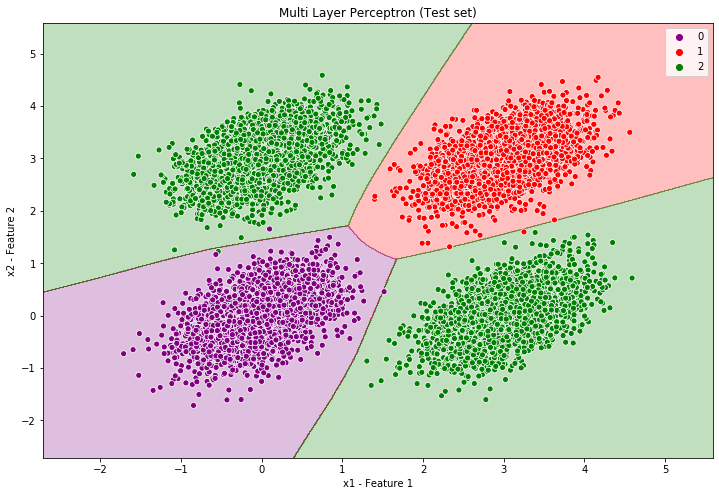

In [0]:
# Visualizing decision boundary for model 4
visualise_decision_boundary(X_test, y_test, model4)

**Evaluation on Setting 4:**                                                        
Nodes in Layer 1 - 50, Layer 2 - 50; Dropout = 0.1 

Training accuracy = 99.95 ; Testing Acuuracy = 99.95                           

With high dimensions and less dropout, decision boundary is accurate in this model having minute errors. This model seems to be the best model of all the settings in terms of accuracy and loss. But having high dimensions and low dropout causes overfitting.


**Setting 5**

In [0]:
# Building model for Setting 5
model5 = build_fc_model(100, 100, 0.5)

# Training
print("Training Results")
model5.fit(X_train, y_train, epochs=5)

# Testing
print("\nTesting Results")
model5.evaluate(X_test,  y_test, verbose=2)

Training Results
Train on 26800 samples
Epoch 1/5
26800/26800 [==============================] - 3s 103us/sample - loss: 0.5014 - accuracy: 0.9160
Epoch 2/5
26800/26800 [==============================] - 2s 90us/sample - loss: 0.0230 - accuracy: 0.9958
Epoch 3/5
26800/26800 [==============================] - 2s 91us/sample - loss: 0.0126 - accuracy: 0.9975
Epoch 4/5
26800/26800 [==============================] - 2s 92us/sample - loss: 0.0083 - accuracy: 0.9981
Epoch 5/5
26800/26800 [==============================] - 2s 91us/sample - loss: 0.0063 - accuracy: 0.9986

Testing Results
13200/1 - 1s - loss: 0.0069 - accuracy: 0.9995


[0.0020636305567688505, 0.99954545]

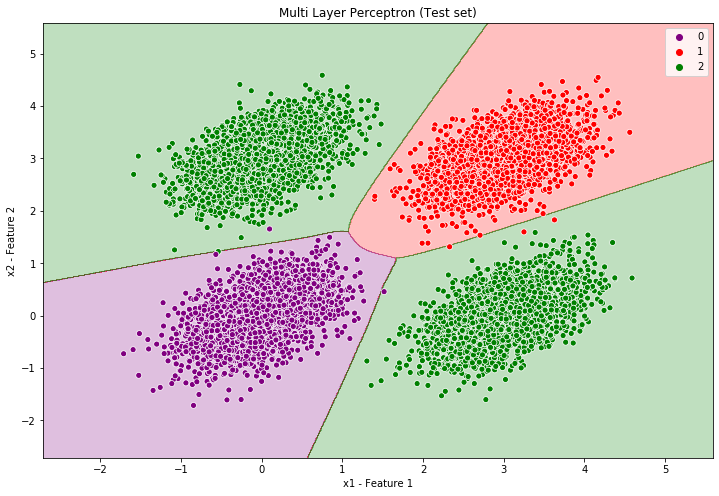

In [0]:
# Visualizing decision boundary for model 5
visualise_decision_boundary(X_test, y_test, model5)

**Evaluation on Setting 5:**                                                        
Nodes in Layer 1 - 100, Layer 2 - 100; Dropout = 0.5                             
Training accuracy = 99.82 ; Testing Acuuracy = 99.93                            

With higher dimensions and medium dropout, decision boundary is smoother when compared to that of setting 4. Having high dimensions along with high dropout protects the model from overfitting.
                             

**DROPOUT:**                                                                         
If dropout is used twice gave high training accuracy (99+) and low testing accuracy (85+) for settings 1, 2 and 4. These settings has 0.1 as dropout.

Setting 3 failed with very low accuracy scores. Setting 5 has low training accuracy (49.79) but high testing accuracy (99.93). These settings has high dropout values 0.8 and 0.5.